In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

_Answer to Problem 1_

**Problem 1**: 7 pts- Another very important class of special functions are called the _Legendre Polynomials_, say $L_{n}(x)$, which are defined for non-negative integer $n$ via the series

$$
L_{n}(x) = \sum_{k=0}^{n}\frac{(n+k)!}{(k!)^{2}(n-k)!}\left(\frac{x-1}{2}\right)^{k}, ~ -1\leq x \leq 1.
$$

Using a `for`-loop, vectorized, recursive approach, write a function which computes the Legendre functions for any non-negative integer $n$ (4pts).  Make a plot showing $L_{n}(x)$ for $n=0,1,2,3,4$ simultaneously, using different colors for each different $n$.  The plot should have a legend as well as appropriately labeled axes.  (3pts)    

_Answer to Problem 1_: So, defining the terms inside the sum as 

$$
a_{k}(x) = \frac{(n+k)!}{(k!)^{2}(n-k)!}\left(\frac{x-1}{2} \right)^{k},
$$

we see that 

$$
\frac{a_{k}(x)}{a_{k-1}(x)} = \frac{(n+k)(n-k+1)}{k^{2}}\left(\frac{x-1}{2}\right)
$$

and thus we have the recursion relationship

$$
a_{k}(x) = \left\{\begin{array}{rl} \frac{(n+k)(n-k+1)}{k^{2}}\left(\frac{x-1}{2}\right)a_{k-1}(x) & k\geq 1 \\ 1 & k=0 \end{array}\right.
$$

In code then, we get 

In [16]:
def legendre_plotter(x,n):
    tot = np.ones(x.size)
    ak = np.ones(x.size)
    xfac = (x-1.)/2.
    for kk in range(1,int(n)+1):
        ak *= (n+kk)*(n-kk+1.)/(kk**2.)*xfac
        tot += ak
    return tot

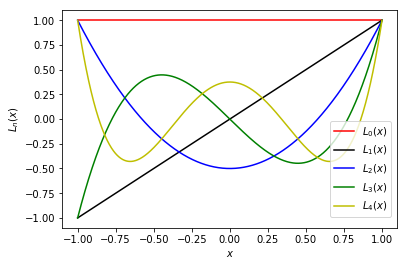

In [26]:
xvals = np.linspace(-1.,1.,int(1e3)+1)
plt_clrs = ['r','k','b','g','y']
for jj in range(5):
    lfunc = legendre_plotter(xvals,jj)
    ljs = r'$L_{'+str(jj)+'}(x)$'
    plt.plot(xvals,lfunc,color=plt_clrs[jj],label=ljs)
plt.xlabel('$x$')
plt.ylabel('$L_{n}(x)$')
plt.legend(loc=(.8,.05))

**Problem 2**: 5 pts - Using a for loop based approach, write a program which finds the function $f(n)$ where 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$

for any positive integer n (2pts).  Generate a labeled plot of the results of your function for $1\leq n \leq 1000$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph. (3pts)      

_Answer to Problem 2_

In [32]:
def fsum(n):
    tot = 0.
    for jj in range(1,n+1):
        tot += (jj/n)**5. + 6.*(jj/n)**3.
    return tot/n

Text(0, 0.5, '$f(n)$')

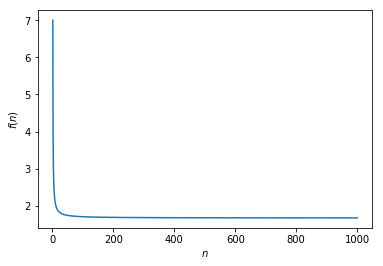

In [36]:
nvals = np.arange(1,1001)
fvals = [fsum(nval) for nval in nvals]
plt.plot(nvals,fvals)
plt.xlabel("$n$")
plt.ylabel("$f(n)$")

In [34]:
print(fsum(1000))

1.670168583333251


So, we see from our plot that 

$$
\lim_{n\rightarrow \infty} f(n) \approx 1.670169
$$

**Problem 3**: 6 pts- Using a vectorized approach, which means no explicit for loops, write a program which finds 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$


for any positive integer n (3pts).  Using `time()`, run several different tests using different values of $n$ to determine how much faster your code is than that used in the previous problem.  For what value of $n$ do you finally see a significant difference in time?  Note, plots are far more preferable than just writing a particular number.  Build a case for your decision please. (3pts)    

_Answer to Problem 3_

In [38]:
def vfsum(n):
    nvals = 1./n*np.arange(1,int(n)+1)
    return 1./n*np.sum( nvals**5. + 6.*nvals**3. )

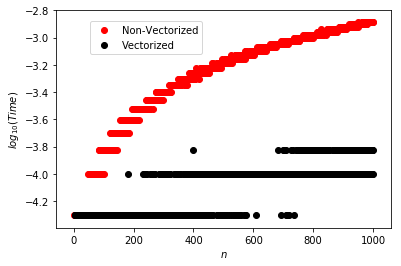

In [47]:
nvals = np.arange(1,int(1e3)+1)
navg = 20 # Number of runs to average over in order to get better timing results.  
tmsnv = np.zeros(nvals.size)
tmsv = np.zeros(nvals.size)
for jj in range(nvals.size):
    
    # Average over multiple runs of the same function 
    # call to get more accurate timing results.  
    tot = 0.
    for kk in range(navg):
        start = time()
        val = fsum(nvals[jj])
        end = time()
        tot += end-start
    tmsnv[jj] = tot/navg
    
    # Average over multiple runs of the same function 
    # call to get more accurate timing results.  
    tot = 0.
    for kk in range(navg):
        start = time()
        val = vfsum(nvals[jj])
        end = time()
        tot += end-start
    tmsv[jj] = tot/navg
    
plt.scatter(nvals,np.ma.log10(tmsnv),color='r',label="Non-Vectorized")
plt.scatter(nvals,np.ma.log10(tmsv),color='k',label="Vectorized")
plt.xlabel("$n$")
plt.ylabel("$log_{10}(Time)$")
plt.legend(loc=(.1,.8))

So we see from plot above that by the time $n=1000$, the non-vectorized code is at least a factor of 10 slower than the vectorized code.  Moreover, we see from the plot that the overall speed of the vectorized code does not change much for $1\leq n \leq 1000$, while for the non-vectorized code the performance degrades for essentially every increase in $n$.  Thus we see that the vectorized code outperforms the non-vectorized version for essentially $n=2$ or so.  

**Problem 4**: We can generalize the Fibonacci sequence so that we have the recurrence relationship

$$
p_{n} = p_{n-1} + ap_{n-2}, ~ a \in \mathbb{R}, ~ n\geq 2,
$$

where we start the sequence $p_{n}$ with the initial conditions

$$
p_{0} = s_{0}, ~ p_{1} = s_{1}, ~ s_{j} \in \mathbb{R}.
$$

4a) (3pts) Using the guess $p_{n} = \lambda^{n}$, show that you get two solutions for $\lambda$, say $\lambda_{\pm}$, where

$$
\lambda_{\pm} = \frac{1}{2}\left(1\pm\sqrt{1+4a} \right)
$$

4b) (3pts) Writing the general solution as 

$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}
$$

show that when we take our initial conditions into account, we find that the constants $c_{+}$ and $c_{-}$ are given by 

$$
c_{+} = \frac{s_{1}-s_{0}\lambda_{-}}{\lambda_{+}-\lambda_{-}}, ~ c_{-} = \frac{s_{0}\lambda_{+}-s_{1}}{\lambda_{+}-\lambda_{-}}
$$

4c) (4pts) Let $a\geq -\frac{1}{4}$.  

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|\leq 1, ~|\lambda_{-}| < 1
$$
    
- Find the range of $a$ such that 

$$ 
|\lambda_{+}|> 1, ~|\lambda_{-}| \leq 1
$$

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|>1, ~|\lambda_{-}| > 1
$$

So, using the initial guess, we get that

$$
\lambda^{n} = \lambda^{n-1} + a\lambda^{n-2},
$$

so that we get

$$
\lambda^{2} = \lambda + a.
$$

Using the quadratic equation then we get

$$
\lambda_{\pm} = \frac{1}{2}\left(1 \pm \sqrt{1+4a} \right)
$$

Thus the general solution to our problem is 

$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}
$$

so that in order to satisfy our initial conditions $p_{0}=s_{0}$ and $p_{1}=s_{1}$, we must have that 

$$
c_{+} + c_{-} = s_{0}
$$

and

$$
c_{+}\lambda_{+} + c_{-}\lambda_{-} = s_{1}
$$

Therefore we have 

$$
c_{-} = s_{0} - c_{+},
$$

and thus 

$$
c_{+}\lambda_{+} + \left(s_{0}-c_{+}\right)\lambda_{-} = s_{1}
$$

and so we get

$$
c_{+} = \frac{s_{1}-\lambda_{-}s_{0}}{\lambda_{+}-\lambda_{-}}.
$$

In turn then we have 

$$
c_{-} = s_{0} - c_{+} = \frac{\lambda_{+}s_{0}-s_{1}}{\lambda_{+}-\lambda_{-}}.
$$

Since $1+4a\geq 0$ for $a\geq -1/4$, $\sqrt{1+4a}$ is always a real, positive number.  We see 

$$
\left|\lambda_{+}\right| < 1
$$

is equivalent to 

$$
-2 < 1 + \sqrt{1+4a} < 2
$$

or

$$
-3 < \sqrt{1+4a} < 1
$$

so that we need only look at 

$$
0\leq \sqrt{1+4a} < 1
$$

and therefore by squaring both sides and rearranging we find 

$$
-\frac{1}{4} \leq a < 0.
$$

Therefore $\lambda_{+}=1$ if $a=0$ and $\lambda_{+}>1$ if $a>0$.  Likewise, looking at $\left|\lambda_{-}\right|<1$,

$$
-2 < 1 - \sqrt{1+4a} < 2,
$$

so that 

$$
-1 < \sqrt{1+4a} < 3,
$$

and thus, ignoring the negative values and squaring both sides 

$$
0 \leq 1 + 4a < 9,
$$

so that 

$$
-\frac{1}{4} \leq a < 2.
$$

Therefore, $\left|\lambda_{-}\right|<1$ for $-1/4\leq a \leq 2$, $\left|\lambda_{-}\right|=1$ for $a=2$, and $\left|\lambda_{-}\right|>1$ for $a>2$.  Therefore, we finally have that

$$
\left|\lambda_{-}\right|<1, ~ \left|\lambda_{+}\right|<1, ~ -\frac{1}{4}\leq a < 0,
$$

$$
\left|\lambda_{-}\right|<1, ~ \left|\lambda_{+}\right|\geq 1, ~ 0\leq a < 2,
$$

and

$$
\left|\lambda_{-}\right|\geq1, ~ \left|\lambda_{+}\right|\geq 1, ~ a \geq 2.
$$


**Problem 5**: Now let us numerically explore the results from Problem 4.  

5a) (3pts) Using the skeleton-code below write a function `fib_general` which generates, for given integer value $n\geq 2$ and real values `a`, `s0`, and `s1`, the $n+1$ array of points `pn` such that 

`
pn[0] = s0, pn[1] = s1
`

and the entries in `pn` are given by the recurrence relationship from Problem 4.  

5b) (3pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, using your results from Problem 4c, choose three values of $a$, one each from the three different ranges of values of $a$, and generate a plot of $p_{n}$ for each.  Make sure axes are appropriately labeled.  Explain how the plot confirms the results you found in Problem 4c.  

5c) (2pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, choose $a=-1/2$ and generate a plot of $p_{n}$.  Briefly explain the results you see and how they differ from those in Problem 5b).  

In [48]:
def fib_general(a,s0,s1,n):
    if n >= 1:
        pn = np.zeros(int(n)+1)
        pn[0] = s0
        pn[1] = s1
        for jj in range(2,int(n)+1):
            pn[jj] = pn[jj-1] + a*pn[jj-2]
    else:
        pn = s0
    return pn

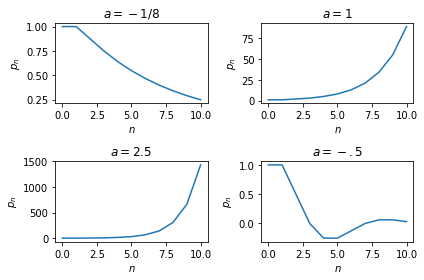

In [53]:
# a = -1/8
p1 = fib_general(-1./8.,1.,1.,10)
# a = 1.
p2 = fib_general(1.,1.,1.,10)
# a = 2.5
p3 = fib_general(2.5,1.,1.,10)
# a = -.5
p4 = fib_general(-.5,1.,1.,10)

nvals = np.arange(10+1)

plt.subplot(221)
plt.plot(nvals,p1)
plt.xlabel('$n$')
plt.ylabel('$p_{n}$')
plt.title('$a=-1/8$')

plt.subplot(222)
plt.plot(nvals,p2)
plt.xlabel('$n$')
plt.ylabel('$p_{n}$')
plt.title('$a=1.$')

plt.subplot(223)
plt.plot(nvals,p3)
plt.xlabel('$n$')
plt.ylabel('$p_{n}$')
plt.title('$a=2.5$')

plt.subplot(224)
plt.plot(nvals,p4)
plt.xlabel('$n$')
plt.ylabel('$p_{n}$')
plt.title('$a=-.5$')

plt.tight_layout()

As we see, for $a=-1/8$, when both $\lambda_{+}$ and $\lambda_{-}$ are less than one in magnitude that $p_{n}\rightarrow 0$, which is to say that the magnitude of the sequence decays as $n$ increases.  In constrast, when $a=1$, since $|\lambda_{+}|>1$, we see that $p_{n}$ grows.  This effect is enhanced for $a=2.5$ because both $\lambda_{+}$ and $\lambda_{-}$ are greater than one in magnitude.  Lastly, when $a=-.5< -1/4$, we see that $p_{n}$ oscillates, which is an effect not seen in any of the previous plots.  